## Kütüphanelerin import Edilmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
%matplotlib notebook

## Sklearn Veri Seti Oluşturma

In [3]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=100, n_features=1, noise=1, n_targets=1,random_state=42)

x = np.array(x)
y = np.array(y).reshape(-1, 1) 

## Gradient Descent Fonksiyonu

In [8]:
def gradient_descent(x, y, theta0, theta1, learning_rate, iterations, threshold):
    m = len(x)
    theta_history = []
    for i in range(iterations):
        # Hesapla
        h = theta0 + theta1 * x
        error = h - y
        
        # Gradient descent adımları
        theta0 = theta0 - (learning_rate/m) * sum(error)
        theta1 = theta1 - (learning_rate/m) * sum(error * x)
        
        error_sum = np.sum(error ** 2)  # Hata karesinin toplamını hesapla
        if error_sum < threshold:
            print(f"Threshold ({threshold}) değeri aşıldı. İterasyon: {i + 1}")
            break
        
        #print(f"Iteration {i + 1}: theta0 = {theta0}, theta1 = {theta1}")
        
        theta_history.append((theta0, theta1))
    return theta_history

## Parametre Değerleri

In [9]:
initial_theta0 = 1
initial_theta1 = 1

learning_rate = 0.01
iterations = 1000
threshold = 1

In [10]:
# Görselleştirme amacıyla bütün iterasyon aşamalarındaki tetha değerleri liste olarak tutuluyor
theta_history = gradient_descent(x, y, initial_theta0, initial_theta1, learning_rate, iterations, threshold)

final_theta0 = theta_history[(len(theta_history)-1)][0]
final_theta1 = theta_history[(len(theta_history)-1)][1]

print(f"Final theta0: {final_theta0}")
print(f"Final theta1: {final_theta1}")

Final theta0: [0.1106561]
Final theta1: [41.99709137]


## Eğitimin Görselleştirilmesi

<IPython.core.display.Javascript object>


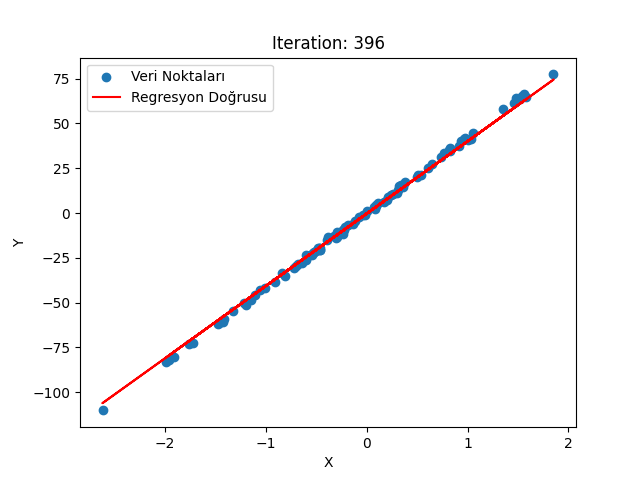

In [11]:
fig, ax = plt.subplots()
ax.scatter(x, y, label='Veri Noktaları')
line, = ax.plot([], [], color='red', label='Regresyon Doğrusu')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Lineer Regresyon')
ax.legend()

def init():
    line.set_data([], [])
    return line,

def animate(i):
    theta0, theta1 = theta_history[i]
    line.set_data(x, theta0 + theta1 * x)
    ax.set_title(f'Iteration: {i+1}')
    return line,

ani = FuncAnimation(fig, animate, frames=len(theta_history), init_func=init, blit=True, interval=100, repeat=False)

plt.show()